In [ ]:
!pip install pandas numpy matplotlib seaborn plotly -q
!pip install folium -q  # For map visualizations (optional)

# For D3.js visualizations, I used IPython and HTML integration
from IPython.display import display, HTML


In [ ]:
!pip install kaggle -q
!kaggle datasets download -d START-UMD/gtd
!unzip gtd.zip


Dataset URL: https://www.kaggle.com/datasets/START-UMD/gtd
License(s): other
gtd.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  gtd.zip
replace globalterrorismdb_0718dist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: globalterrorismdb_0718dist.csv  


In [ ]:
import pandas as pd

file_path = '/content/globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head()

<ipython-input-5-71998e827e06>:4: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#checking the data and if null values are present
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,172452
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


In [ ]:
# prompt: What cleaning can I do on this data

# 1. Handling Missing Values:

#  - Identify columns with a high percentage of missing values.
#  - Decide whether to drop those columns or impute missing values with appropriate methods (mean, median, mode, or advanced techniques like KNN imputation).

for column in df.columns:
    percentage_missing = (df[column].isnull().sum() / len(df)) * 100
    if percentage_missing > 50: # Adjust the threshold as needed
        print(f"Column '{column}' has {percentage_missing:.2f}% missing values. Consider dropping.")

# 2. Data Type Conversion:

# - Check if any columns are in the wrong data type (e.g., numerical columns stored as strings).
# - Convert them to the appropriate data type for analysis and modeling.

# Example:
# if 'column_name' should be numeric but is stored as string
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')


# 3. Removing Duplicates:

# - Check for duplicate rows and decide whether to remove them.
# - If there are duplicates, it could indicate data entry errors or data collection issues.

df.duplicated().sum()
# df.drop_duplicates(inplace=True)


# 4. Outlier Detection and Treatment:

# - Identify outliers in numerical columns using methods like box plots or IQR (interquartile range).
# - Decide whether to remove outliers or transform them (e.g., using winsorization or log transformation).

# Example:
# for column in numeric_columns:
#    q1 = df[column].quantile(0.25)
#    q3 = df[column].quantile(0.75)
#    iqr = q3 - q1
#    lower_bound = q1 - 1.5 * iqr
#    upper_bound = q3 + 1.5 * iqr
#    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# 5. Inconsistent Data Entries:

# - Check for inconsistencies in categorical data (e.g., different spellings of the same category).
# - Standardize the entries to ensure consistency.

# Example:
# df['city'] = df['city'].str.lower().str.strip()



# 6. Handling Special Characters:

# - Check if any columns have special characters that might interfere with analysis.
# - Remove or replace those characters as needed.


# 7. Feature Engineering (Optional):

# - Create new features from existing ones that might be more informative for your analysis.

# Example:
# df['year_month'] = pd.to_datetime(df['iyear'].astype(str) + '-' + df['imonth'].astype(str), format='%Y-%m')

# After performing these steps, don't forget to examine your cleaned data again to ensure that it meets your analysis needs.


Column 'approxdate' has 94.91% missing values. Consider dropping.
Column 'resolution' has 98.78% missing values. Consider dropping.
Column 'location' has 69.46% missing values. Consider dropping.
Column 'alternative' has 84.03% missing values. Consider dropping.
Column 'alternative_txt' has 84.03% missing values. Consider dropping.
Column 'attacktype2' has 96.52% missing values. Consider dropping.
Column 'attacktype2_txt' has 96.52% missing values. Consider dropping.
Column 'attacktype3' has 99.76% missing values. Consider dropping.
Column 'attacktype3_txt' has 99.76% missing values. Consider dropping.
Column 'targtype2' has 93.87% missing values. Consider dropping.
Column 'targtype2_txt' has 93.87% missing values. Consider dropping.
Column 'targsubtype2' has 94.12% missing values. Consider dropping.
Column 'targsubtype2_txt' has 94.12% missing values. Consider dropping.
Column 'corp2' has 94.43% missing values. Consider dropping.
Column 'target2' has 93.93% missing values. Consider dr

0

In [ ]:
threshold = 50
columns_to_drop = [column for column in df.columns if (df[column].isnull().sum() / len(df)) * 100 > threshold]
df_cleaned = df.drop(columns=columns_to_drop)

# Check the remaining columns
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181256 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

## EDA

##Outlier Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

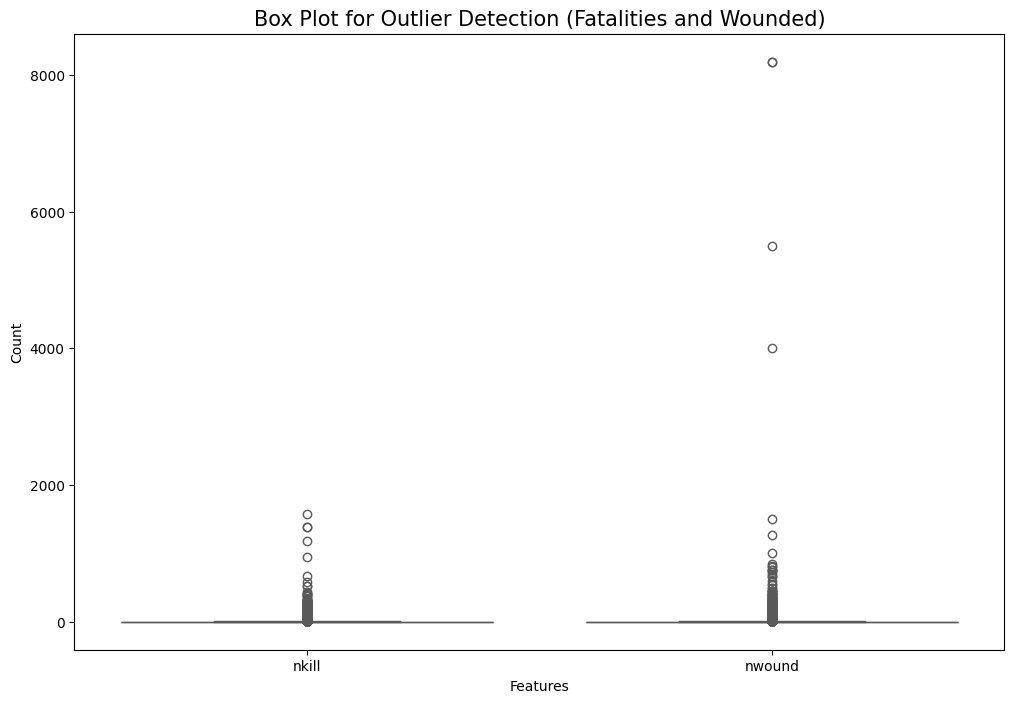

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

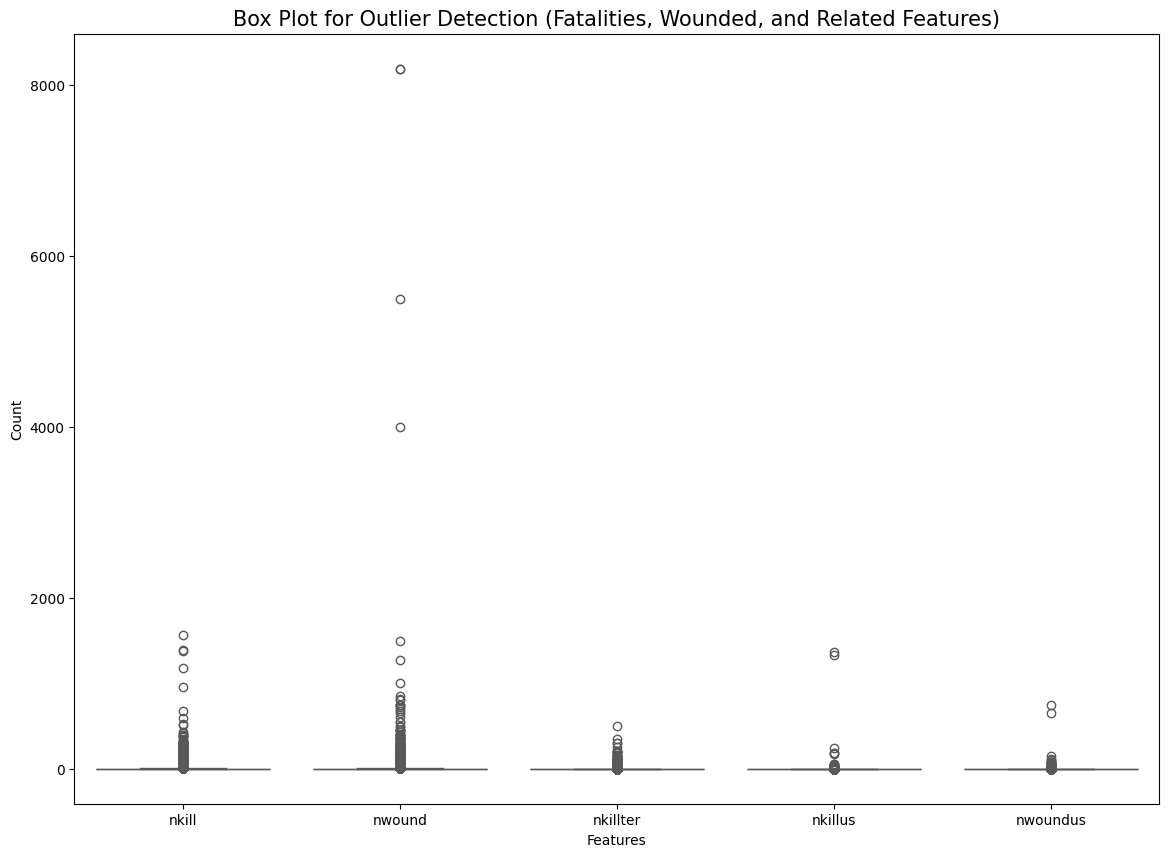



Outliers detected based on Z-score method:
(array([    75,    202,    968, ..., 164133, 164479, 164729]), array([0, 0, 1, ..., 0, 0, 0]))


In [ ]:
#Outlier Analysis
# Outlier detection using boxplot for 'nkill' and 'nwound'
# Import the necessary library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Creating a box plot for 'nkill' and 'nwound'
sns.boxplot(data=df[['nkill', 'nwound']], palette="Set2")

# Add titles and labels
plt.title('Box Plot for Outlier Detection (Fatalities and Wounded)', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Features')

# Show the plot
plt.show()

print()
print()


# Set the figure size for better visibility
plt.figure(figsize=(14, 10))

# Creating a box plot for multiple features
sns.boxplot(data=df[['nkill', 'nwound', 'nkillter', 'nkillus', 'nwoundus']], palette="Set2")

# Add titles and labels
plt.title('Box Plot for Outlier Detection (Fatalities, Wounded, and Related Features)', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Features')

# Show the plot
plt.show()

print()
print()

from scipy import stats
import numpy as np

# Z-score for outlier detection
z_scores = np.abs(stats.zscore(df[['nkill', 'nwound']].dropna()))
outliers = np.where(z_scores > 3)

print("Outliers detected based on Z-score method:")
print(outliers)



## Feature Engineering

In [ ]:
# Create a new feature: Fatality Rate (nkill / nperps)
df['fatality_rate'] = df['nkill'] / df['nperps']
df['fatality_rate'].fillna(0, inplace=True)  # Replace NaN values with 0


<ipython-input-50-d9a09d313ad7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fatality_rate'].fillna(0, inplace=True)  # Replace NaN values with 0


In [ ]:
# Create a new feature: Wounded Rate (nwound / nperps)
df['wounded_rate'] = df['nwound'] / df['nperps']
df['wounded_rate'].fillna(0, inplace=True)  # Replace NaN values with 0


<ipython-input-51-098586100510>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wounded_rate'].fillna(0, inplace=True)  # Replace NaN values with 0


In [ ]:
# Create a new feature: Attack Severity
df['attack_severity'] = df['nkill'] + df['nwound']

# Define severity levels
df['severity_level'] = pd.cut(df['attack_severity'],
                              bins=[-1, 0, 10, 50, 100, np.inf],
                              labels=['None', 'Low', 'Medium', 'High', 'Severe'])


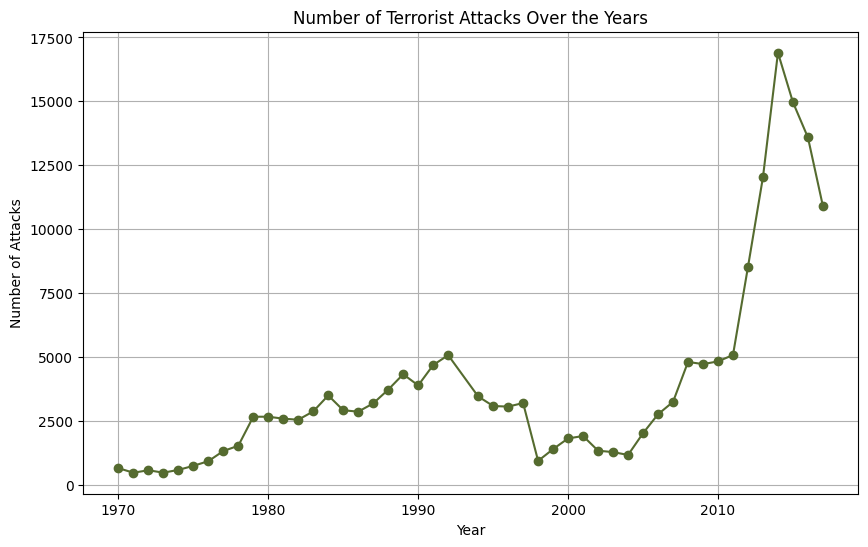

In [ ]:
#Univariate analysis
# Group by year to check the number of attacks per year
attacks_per_year = df_cleaned.groupby('iyear').size()

# Plotting the number of terrorist attacks per year
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', color='#556B2F')
plt.title('Number of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()


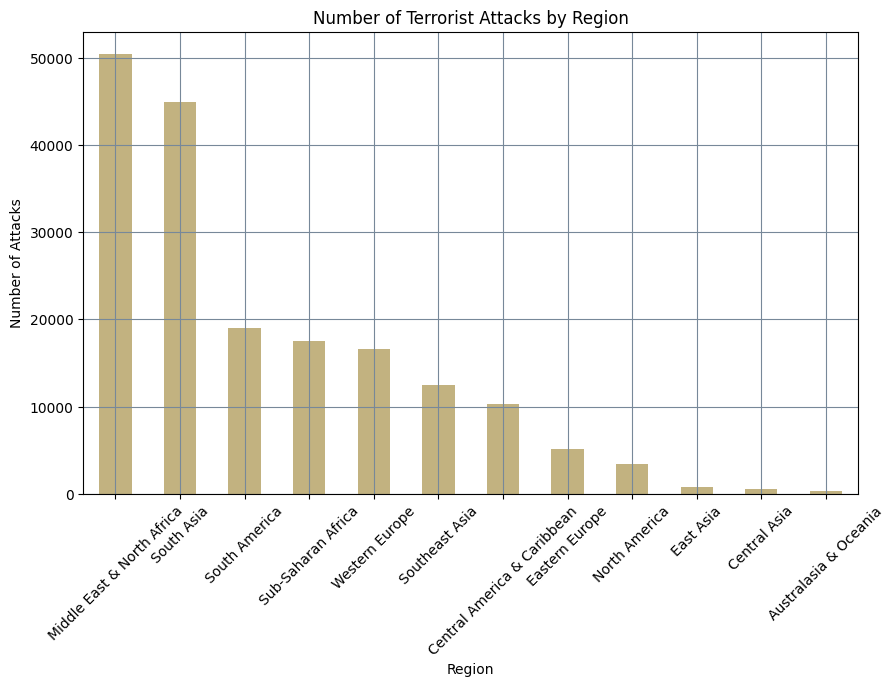

In [ ]:
# Plotting the number of attacks by region
region_attacks = df_cleaned['region_txt'].value_counts()

plt.figure(figsize=(10,6))
region_attacks.plot(kind='bar', color='#C2B280')  # Sand color
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid(True, color='#778899')  # Slate gray
plt.show()


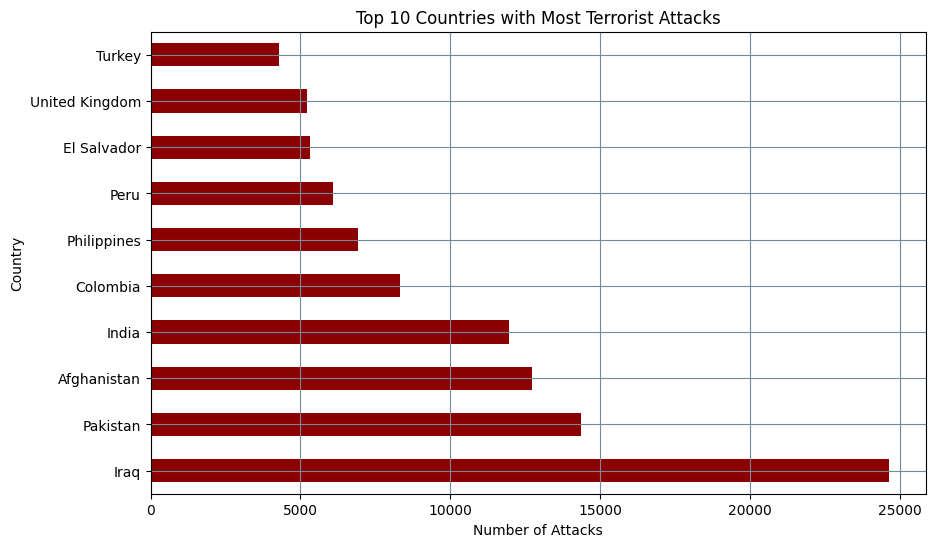

In [ ]:
# Plotting the top 10 countries with the most terrorist attacks
top_countries = df_cleaned['country_txt'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='#8B0000')  # Deep red
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.grid(True, color='#778899')  # Slate gray
plt.show()


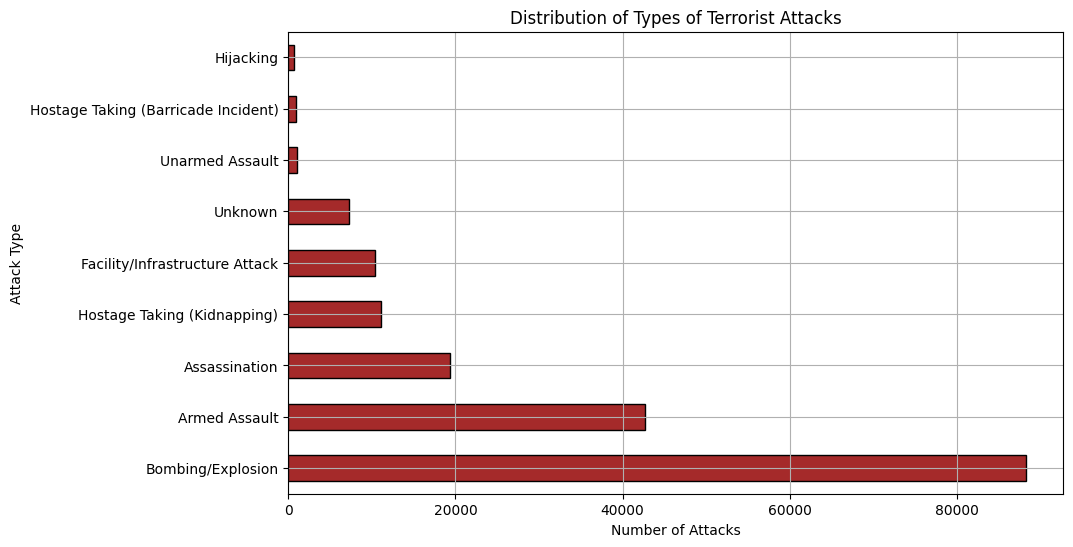

In [ ]:
# Distribution of attack types
plt.figure(figsize=(10, 6))
df['attacktype1_txt'].value_counts().plot(kind='barh', color='brown', edgecolor='black')
plt.title('Distribution of Types of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.grid(True)
plt.show()


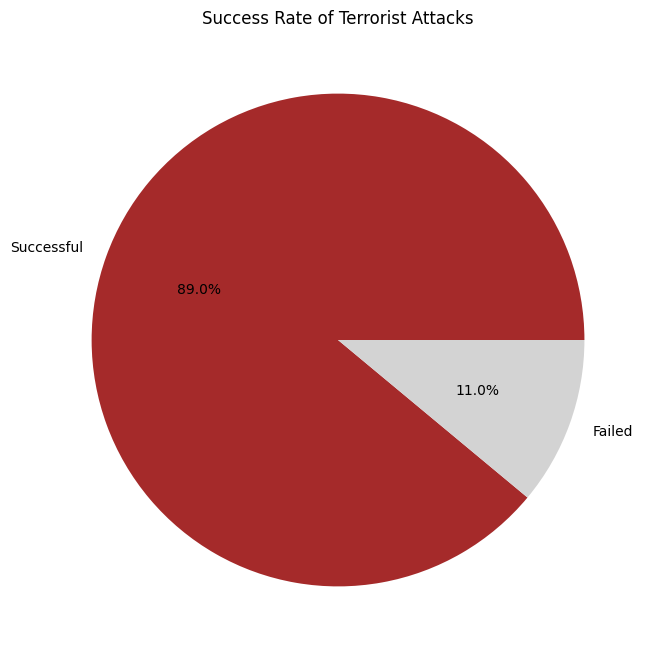

In [ ]:
# Success of attacks
plt.figure(figsize=(8, 8))
df['success'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['brown', 'lightgrey'], labels=['Successful', 'Failed'])
plt.title('Success Rate of Terrorist Attacks')
plt.ylabel('')
plt.show()


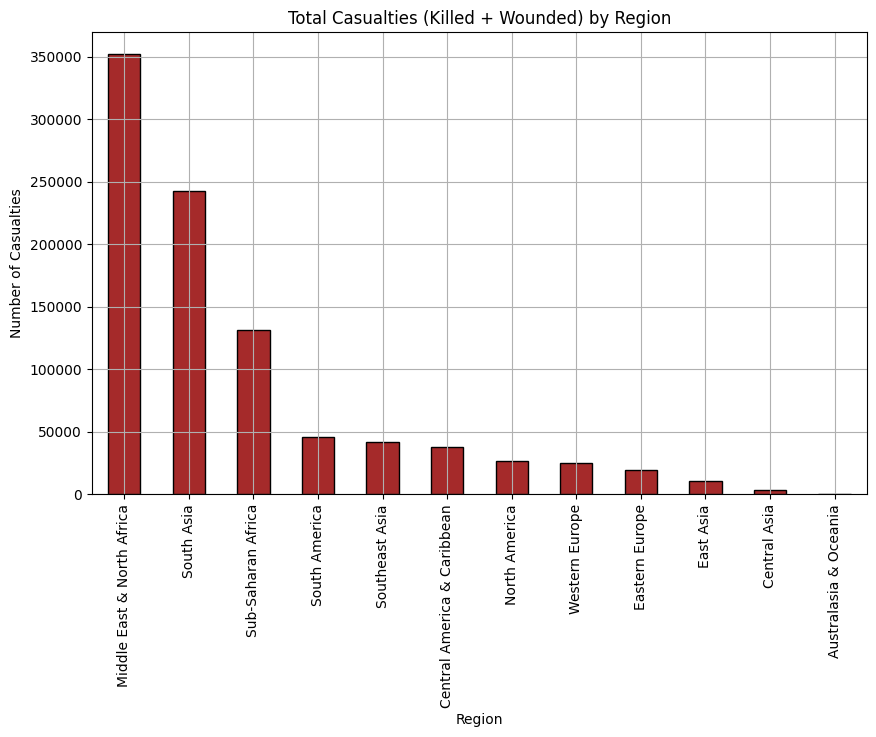

In [ ]:
# Grouping by region and calculating total casualties (killed + wounded)
df['total_casualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)
casualties_by_region = df.groupby('region_txt')['total_casualties'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
casualties_by_region.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Total Casualties (Killed + Wounded) by Region')
plt.xlabel('Region')
plt.ylabel('Number of Casualties')
plt.grid(True)
plt.show()


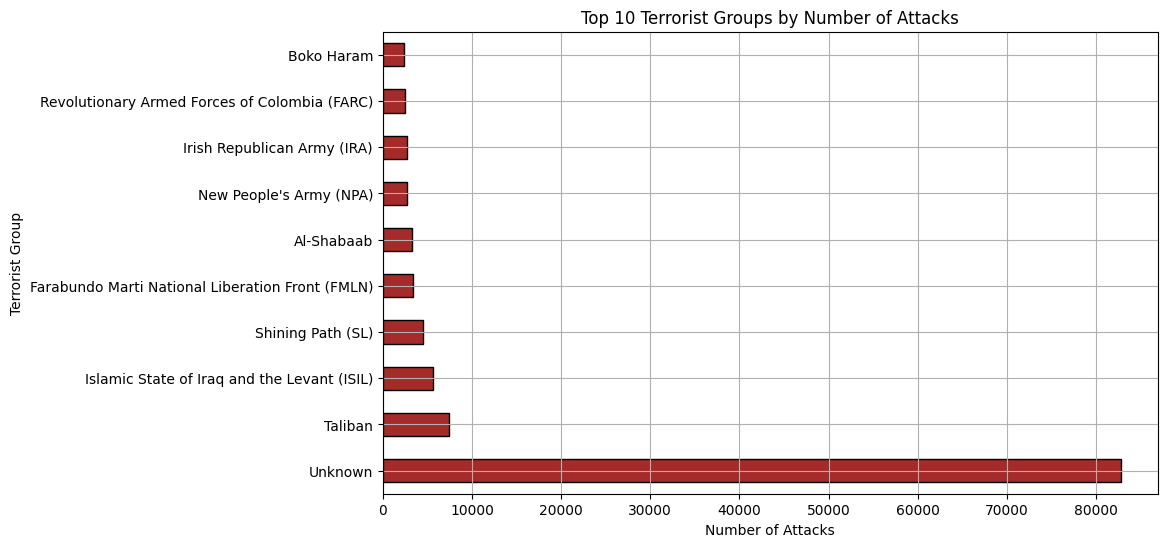

In [ ]:
# Top 10 terrorist groups by number of attacks
top_groups = df['gname'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_groups.plot(kind='barh', color='brown', edgecolor='black')
plt.title('Top 10 Terrorist Groups by Number of Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Group')
plt.grid(True)
plt.show()


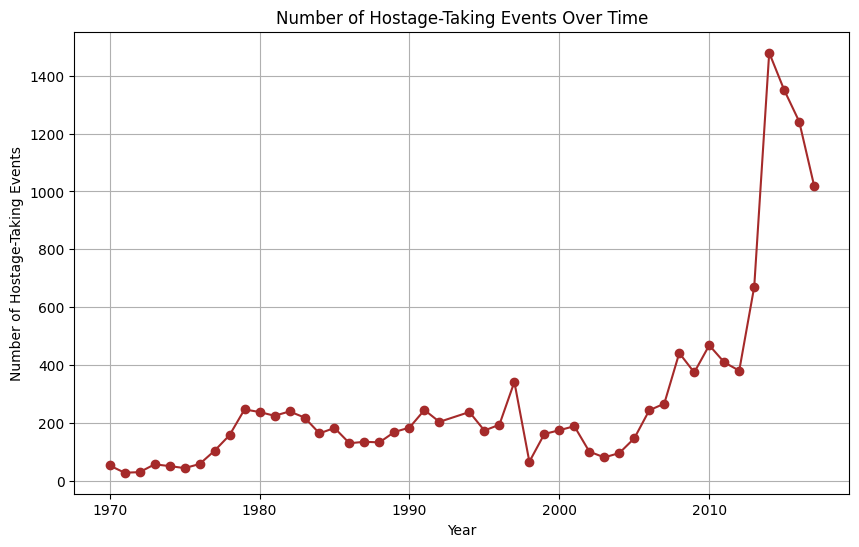

In [ ]:
# Hostage taking events over time
plt.figure(figsize=(10, 6))
df[df['ishostkid'] == 1].groupby('iyear').size().plot(kind='line', marker='o', color='brown')
plt.title('Number of Hostage-Taking Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Hostage-Taking Events')
plt.grid(True)
plt.show()


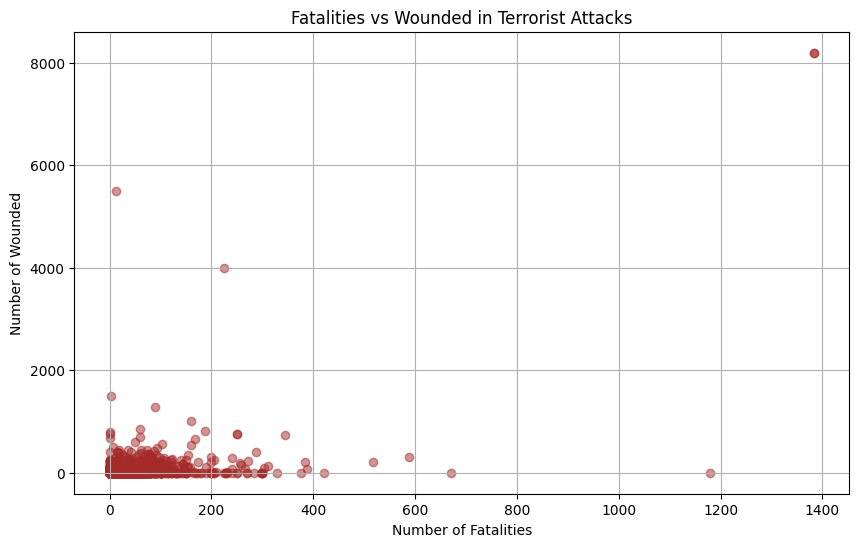

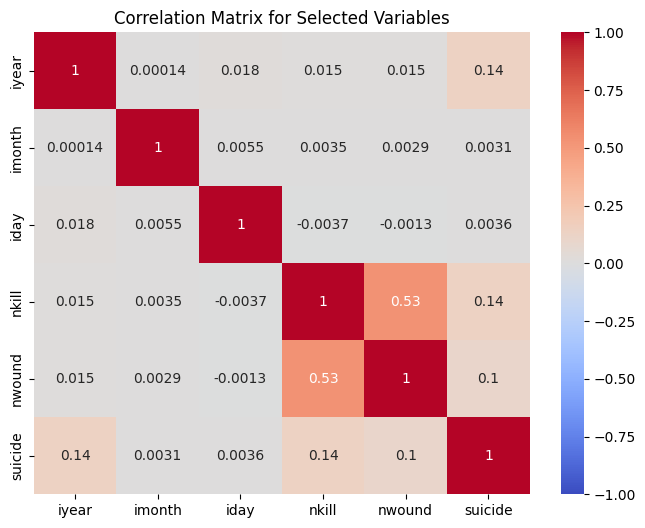

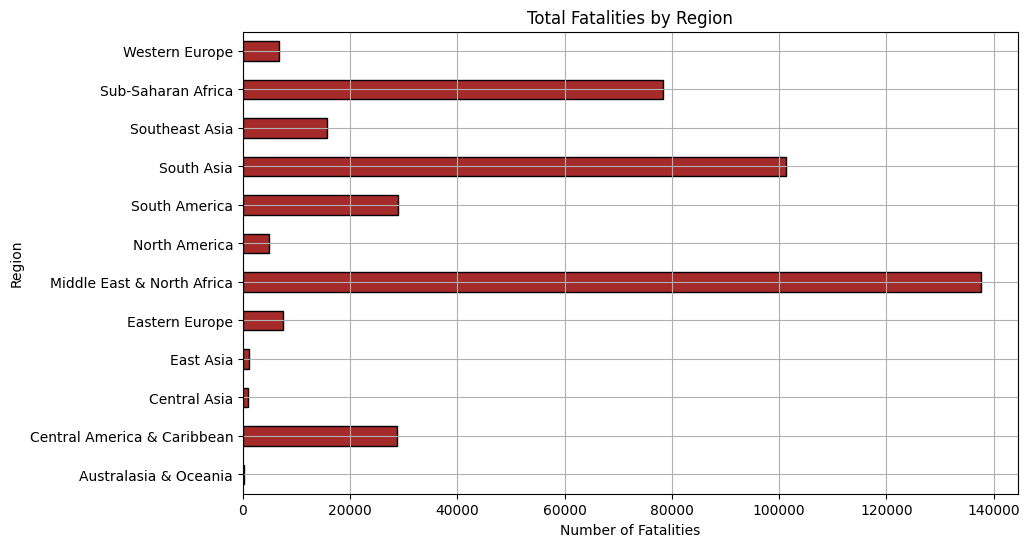

In [ ]:
#BIVariate analysis
import seaborn as sns
# Scatter plot for fatalities vs wounded
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['nkill'], df_cleaned['nwound'], alpha=0.5, color='brown')
plt.title('Fatalities vs Wounded in Terrorist Attacks')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Wounded')
plt.grid(True)
plt.show()
print()
print()

# Selecting only numeric columns for the correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for selected features
selected_columns = ['iyear', 'imonth', 'iday', 'nkill', 'nwound', 'suicide']
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[selected_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Variables')
plt.show()

print()
print()

# Grouped bar chart for fatalities by region
plt.figure(figsize=(10, 6))
df_cleaned.groupby('region_txt')['nkill'].sum().plot(kind='barh', color='brown', edgecolor='black')
plt.title('Total Fatalities by Region')
plt.xlabel('Number of Fatalities')
plt.ylabel('Region')
plt.grid(True)
plt.show()


<ipython-input-53-ec35e2277198>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region_txt', y='attack_severity', data=df, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

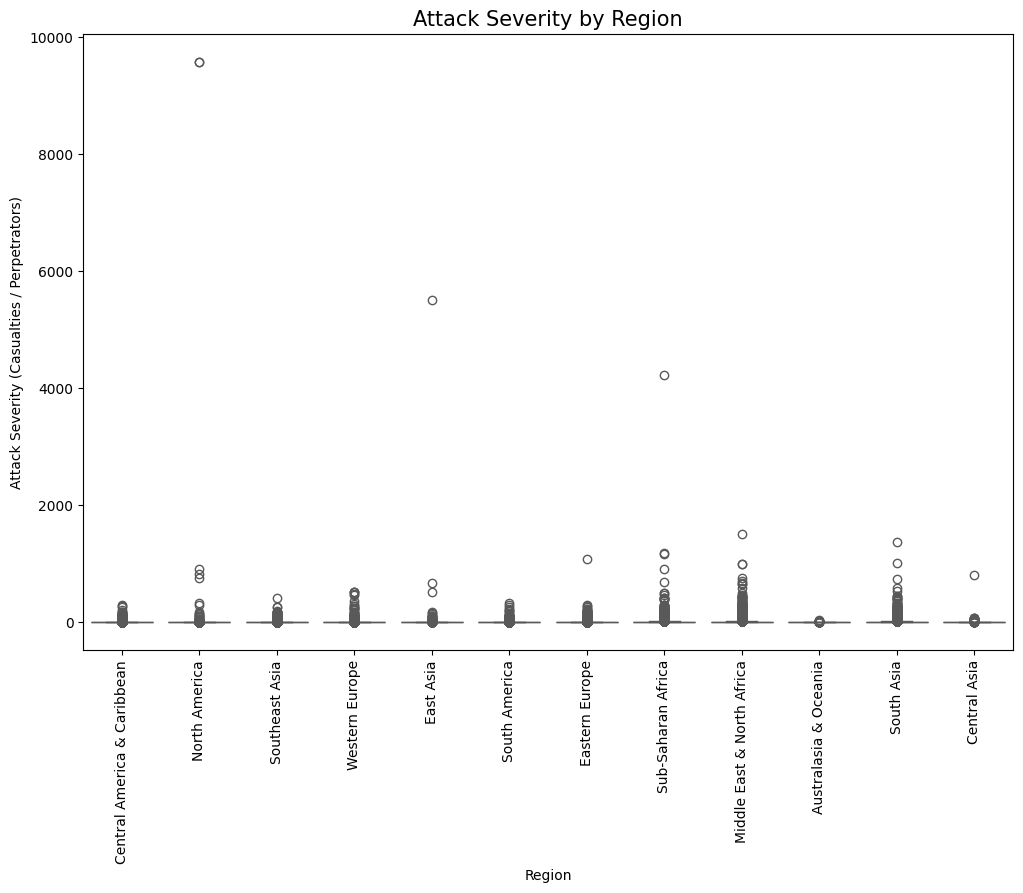

In [ ]:
# Plotting the Attack Severity across regions
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_txt', y='attack_severity', data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title('Attack Severity by Region', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Attack Severity (Casualties / Perpetrators)')
plt.show()


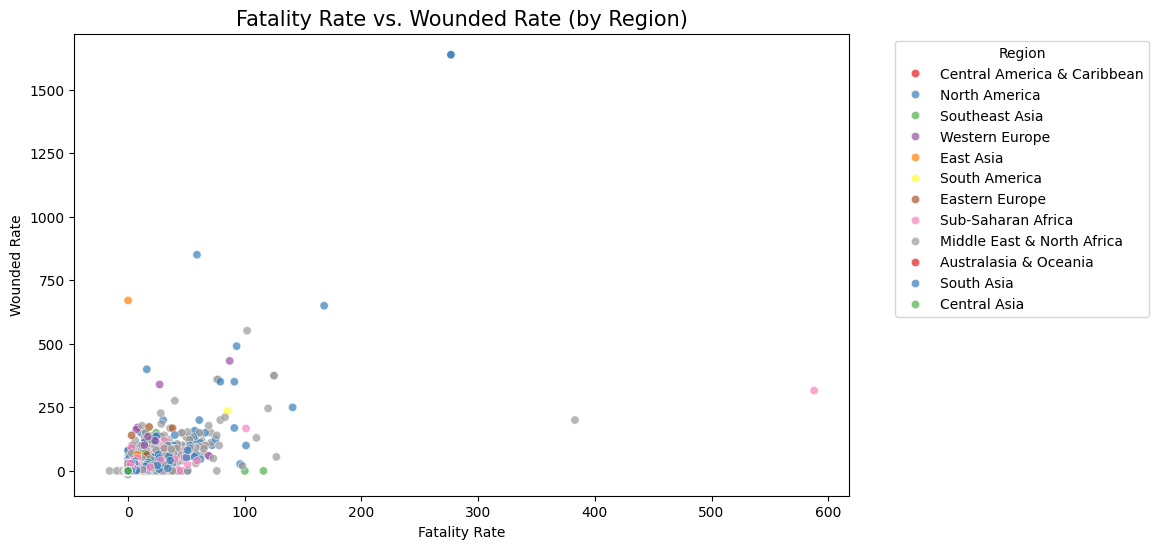

In [ ]:
# Scatter plot for Fatality Rate vs. Wounded Rate, colored by region
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fatality_rate', y='wounded_rate', hue='region_txt', data=df, palette='Set1', alpha=0.7)
plt.title('Fatality Rate vs. Wounded Rate (by Region)', fontsize=15)
plt.xlabel('Fatality Rate')
plt.ylabel('Wounded Rate')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


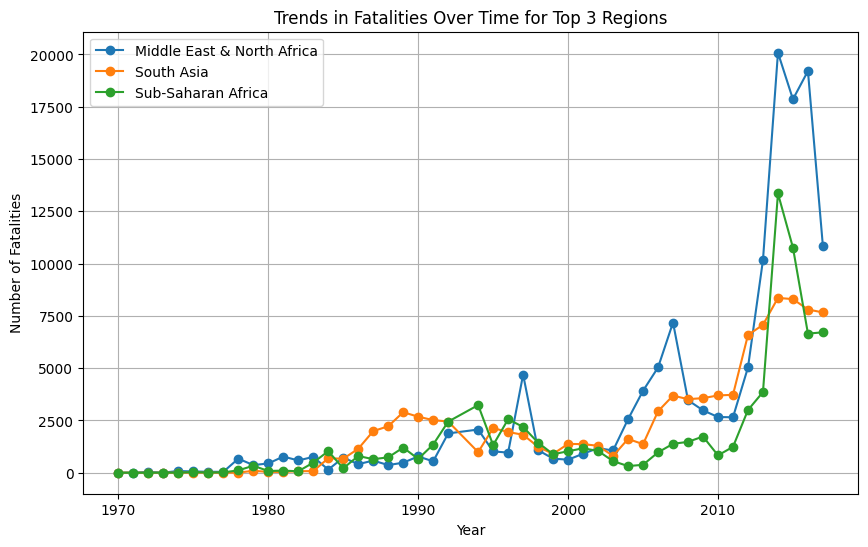

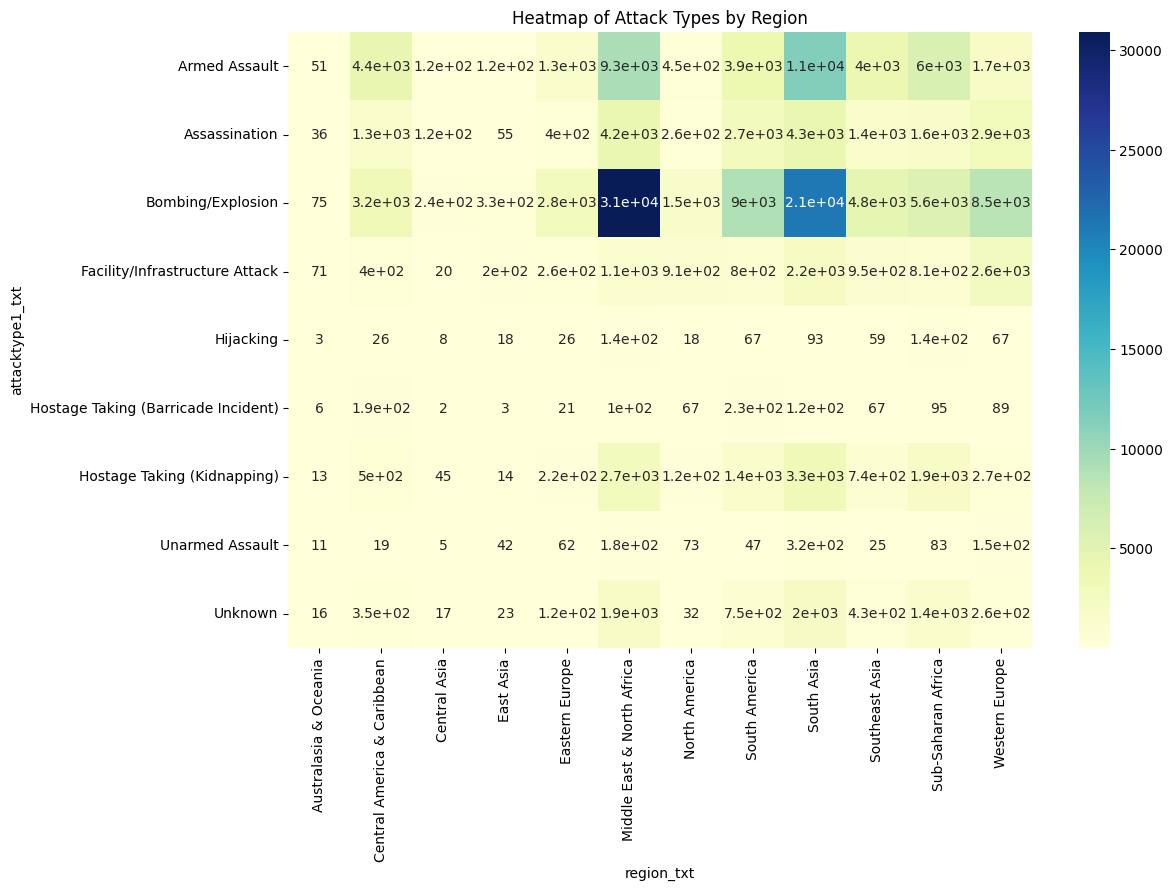

In [ ]:
#Multivariate analysis

# Analyzing fatalities over time for the top 3 regions with the most fatalities
top_regions = df_cleaned.groupby('region_txt')['nkill'].sum().nlargest(3).index
plt.figure(figsize=(10, 6))
for region in top_regions:
    df_cleaned[df_cleaned['region_txt'] == region].groupby('iyear')['nkill'].sum().plot(label=region, marker='o')

plt.title('Trends in Fatalities Over Time for Top 3 Regions')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()
print()
print()

# Heatmap for attack types by region
attack_region_pivot = pd.pivot_table(df_cleaned, values='eventid', index='attacktype1_txt', columns='region_txt', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(attack_region_pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Attack Types by Region')
plt.show()


In [ ]:
# Function to render D3.js HTML content in Colab
from IPython.display import display, HTML

def display_d3(html_content):
    display(HTML(html_content))

# Prepare data for D3.js visualization (Top 5 countries by number of attacks)
top_5_countries = df_cleaned['country_txt'].value_counts().nlargest(5)

html_template = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <script src="https://d3js.org/d3.v5.min.js"></script>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        .bar {{ fill: #556B2F; }}  /* Data-Driven Neutral palette */
        .axis-label {{ font-size: 14px; }}
    </style>
    <title>Top 5 Countries by Number of Attacks</title>
</head>
<body>
    <svg width="600" height="400"></svg>

    <script>
        var data = {list(top_5_countries.values)};  // Top 5 countries attack values
        var labels = {list(top_5_countries.index)};  // Top 5 country names

        var svg = d3.select("svg"),
            margin = {{top: 50, right: 30, bottom: 40, left: 90}},  // Adjusted top margin for title
            width = +svg.attr("width") - margin.left - margin.right,
            height = +svg.attr("height") - margin.top - margin.bottom;

        // Add the title
        svg.append("text")
            .attr("x", width / 2 + margin.left)  // Center the title
            .attr("y", margin.top / 2)  // Position above the graph
            .attr("text-anchor", "middle")
            .style("font-size", "16px")
            .style("font-weight", "bold")
            .text("Top 5 Countries by Number of Attacks");

        var x = d3.scaleLinear()
            .domain([0, d3.max(data)])
            .range([0, width]);

        var y = d3.scaleBand()
            .domain(labels)
            .range([0, height])
            .padding(0.1);

        var g = svg.append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        g.append("g")
            .call(d3.axisLeft(y).tickSize(0));

        g.selectAll(".bar")
            .data(data)
            .enter().append("rect")
            .attr("class", "bar")
            .attr("x", 0)
            .attr("y", function(d, i) {{ return y(labels[i]); }})
            .attr("width", function(d) {{ return x(d); }})
            .attr("height", y.bandwidth());

    </script>
</body>
</html>
"""

# Display D3.js visualization
display_d3(html_template)


In [ ]:
from IPython.core.display import display, HTML

# HTML and D3.js code embedded in Colab
html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        .bar {
            fill: steelblue;
        }
        .bar:hover {
            fill: orange;
        }
        .axis-label {
            font-size: 14px;
        }
        .title {
            font-size: 18px;
            font-weight: bold;
        }
    </style>
    <title>Attack Severity by Region</title>
</head>
<body>
    <svg width="800" height="500"></svg>
    <script>
        // Sample Data
        const data = [
            { region: "Middle East & North Africa", severity: 7.5 },
            { region: "South Asia", severity: 8.2 },
            { region: "Sub-Saharan Africa", severity: 6.9 },
            { region: "Southeast Asia", severity: 5.4 },
            { region: "Western Europe", severity: 3.2 }
        ];

        const margin = { top: 60, right: 30, bottom: 70, left: 60 },
              width = 800 - margin.left - margin.right,
              height = 500 - margin.top - margin.bottom;

        const svg = d3.select("svg")
                      .attr("width", width + margin.left + margin.right)
                      .attr("height", height + margin.top + margin.bottom)
                      .append("g")
                      .attr("transform", `translate(${margin.left}, ${margin.top})`);

        // X Scale
        const x = d3.scaleBand()
                    .domain(data.map(d => d.region))
                    .range([0, width])
                    .padding(0.1);

        // Y Scale
        const y = d3.scaleLinear()
                    .domain([0, d3.max(data, d => d.severity)])
                    .nice()
                    .range([height, 0]);

        // Add Title
        d3.select("svg")
          .append("text")
          .attr("class", "title")
          .attr("x", (width + margin.left + margin.right) / 2)
          .attr("y", margin.top / 2)
          .attr("text-anchor", "middle")
          .text("Attack Severity by Region");

        // X Axis
        svg.append("g")
           .attr("transform", `translate(0, ${height})`)
           .call(d3.axisBottom(x))
           .selectAll("text")
           .attr("transform", "rotate(-45)")
           .style("text-anchor", "end");

        // Y Axis
        svg.append("g")
           .call(d3.axisLeft(y));

        // Bars
        svg.selectAll(".bar")
           .data(data)
           .enter().append("rect")
           .attr("class", "bar")
           .attr("x", d => x(d.region))
           .attr("y", d => y(d.severity))
           .attr("width", x.bandwidth())
           .attr("height", d => height - y(d.severity));

        // X Axis Label
        svg.append("text")
           .attr("class", "axis-label")
           .attr("x", width / 2)
           .attr("y", height + margin.bottom - 10)
           .style("text-anchor", "middle")
           .text("Region");

        // Y Axis Label
        svg.append("text")
           .attr("class", "axis-label")
           .attr("x", -height / 2)
           .attr("y", -margin.left + 20)
           .attr("transform", "rotate(-90)")
           .style("text-anchor", "middle")
           .text("Attack Severity");
    </script>
</body>
</html>
"""

# Display the HTML + D3.js in Colab
display(HTML(html_code))
